I try to reproduce the notebook from https://colab.research.google.com/github/gbrammer/eazy-py/blob/master/docs/examples/HDFN-demo.ipynb#scrollTo=-fcqHKo4-HU-

In [1]:
import importlib
import sys
import time
print(time.ctime() + '\n')

print(sys.version + '\n')

for module in ['numpy', 'scipy', 'matplotlib','astropy','eazy', 'prospect']:
    #print(module)
    mod = importlib.import_module(module)
    print('{0:>20} : {1}'.format(module, mod.__version__))

Fri Dec 30 15:22:07 2022

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

               numpy : 1.21.2
               scipy : 1.3.0
          matplotlib : 3.3.3
             astropy : 4.0.1.post1
                eazy : 0.6.1


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

            prospect : 1.1.0


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import eazy

# Symlink templates & filters from the eazy-code repository
try:
    print('EAZYCODE = '+os.getenv('EAZYCODE'))
except:
    pass

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs() 

In [3]:
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [4]:
parameter_file = '/Users/philipp/Documents/PhD/lum_func_measurement/params_cosmos_data.txt'
translate_file = '/Users/philipp/Documents/PhD/lum_func_measurement/translate.txt'
# translate_farmer_file = '/Users/philipp/Documents/PhD/lum_func_measurement/translate_farmer.txt'

In [5]:
self = eazy.photoz.PhotoZ(param_file=parameter_file, translate_file=translate_file, zeropoint_file=None, 
                          load_prior=True, load_products=False)

Read default param file: /Users/philipp/Documents/PhD/lum_func_measurement/params_cosmos_data.txt
Read CATALOG_FILE: /Users/philipp/Documents/PhD/Data/COSMOS2020_Classic_processed.fits
   >>> NOBJ = 723897
HSC_g_FLUX_APER3 HSC_g_FLUXERR_APER3 (314): g_HSC.txt
HSC_r_FLUX_APER3 HSC_r_FLUXERR_APER3 (315): r_HSC.txt
HSC_i_FLUX_APER3 HSC_i_FLUXERR_APER3 (316): i_HSC.txt
HSC_z_FLUX_APER3 HSC_z_FLUXERR_APER3 (317): z_HSC.txt
HSC_y_FLUX_APER3 HSC_y_FLUXERR_APER3 (318): y_HSC.txt
UVISTA_Y_FLUX_APER3 UVISTA_Y_FLUXERR_APER3 (256): VISTA/Y_system+atmos.dat
UVISTA_J_FLUX_APER3 UVISTA_J_FLUXERR_APER3 (257): VISTA/J_system+atmos.dat
UVISTA_H_FLUX_APER3 UVISTA_H_FLUXERR_APER3 (258): VISTA/H_system+atmos.dat
UVISTA_Ks_FLUX_APER3 UVISTA_Ks_FLUXERR_APER3 (259): VISTA/Ks_system+atmos.dat
SC_B_FLUX_APER3 SC_B_FLUXERR_APER3 ( 78): COSMOS/SUBARU_filter_B.txt
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  templates/prior_R_extend.dat
Template grid: templates/br07_default.spectra.param (this may take som

100%|██████████| 5/5 [00:42<00:00,  8.60s/it]


Template   0: default_sed1_ext.dat (NZ=1).
Template   1: default_sed2_ext.dat (NZ=1).
Template   2: default_sed3_ext.dat (NZ=1).
Template   3: default_sed4_ext.dat (NZ=1).
Template   4: default_sed5_ext.dat (NZ=1).
Process templates: 43.853 s


239it [00:38,  6.79it/s]


In [6]:
sn = self.fnu/self.efnu
clip = (sn > 1).sum(axis=1)
print(sn)
print(clip)
print(self.idx[clip])

[[ 2.3071074   2.0556443   2.4971995  ...  0.18547922 -0.7291422
   2.6485124 ]
 [13.603112   11.598248    9.15278    ...  0.20177317 -0.73757553
   6.8556175 ]
 [ 8.727976    7.279141   10.185422   ... -0.4787766   1.5531259
   5.318984  ]
 ...
 [39.37348    39.768265   41.456326   ... 20.88103    18.152342
  36.84423   ]
 [85.538345   95.54968    97.88787    ... 95.73195    98.53591
  91.496376  ]
 [94.8619     97.13216    98.22489    ... 92.29385    96.93678
  99.00771   ]]
[ 6  7  8 ... 10 10 10]
[ 6  7  8 ... 10 10 10]


In [7]:
print(self.fnu.shape)
print(self.efnu)

(723897, 10)
[[0.01288619 0.0182228  0.02275878 ... 0.65139097 0.3776975  0.0185101 ]
 [0.01376367 0.01965206 0.02418539 ... 0.8454549  0.4396045  0.01923144]
 [0.01378414 0.01867822 0.02438749 ... 0.7092799  0.39301056 0.0174774 ]
 ...
 [0.01747203 0.02021389 0.02126677 ... 0.11803675 0.17061749 0.01615586]
 [0.08547522 0.29326853 0.506338   ... 1.650099   1.988071   0.04572394]
 [0.24103715 0.45296544 0.5981907  ... 1.4282832  1.6023751  0.1494932 ]]


In [8]:
print(self.RES[314])
print(self.flux_columns)
print(self.err_columns)
print(self.f_numbers)
print(self.NFILT)
print(self.cat['HSC_g_FLUX_APER3'])
print(self.ok_data)

g_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=4798.2 AB-Vega=-0.089
['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3', 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3', 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3', 'SC_B_FLUX_APER3']
['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3', 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3', 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3', 'SC_B_FLUXERR_APER3']
[314 315 316 317 318 256 257 258 259  78]
10
HSC_g_FLUX_APER3
      uJy       
----------------
     0.029729823
      0.18722874
     0.120307654
      0.07510333
      0.08674096
      0.18743107
     0.053674363
      0.15295479
      0.02408235
      0.04058892
             ...
       1.7151455
       0.2804805
       5.9748597
       23.060568
       1.4368715
      0.41040614
       5.9635944
      0.68793446
        7.311409
       22.865242
Len

NBIN:  180
NOBJ:  723897
7238
Iteration:  0


100%|██████████| 239/239 [1:08:17<00:00,  7.54s/it]


Compute best fits
fit_best: 30.8 s (n_proc=6,  NOBJ=704365)
Fit 4154.0 s (n_proc=6, NOBJ=704449)
Iterative correction - zeropoint / template
Iteration:  1


 15%|█▍        | 35/239 [11:41<27:14,  8.01s/it]  Process ForkPoolWorker-22:
Process ForkPoolWorker-25:
Process ForkPoolWorker-21:
Process ForkPoolWorker-23:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Applications/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, i

KeyboardInterrupt: 

  File "/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py", line 48, in _sum
    return umr_sum(a, axis, dtype, out, keepdims, initial, where)
  File "/Applications/anaconda3/lib/python3.7/site-packages/eazy/photoz.py", line 5972, in template_lsq
    Ax = (A/rms).T[ok_band,:]*1
KeyboardInterrupt
  File "/Applications/anaconda3/lib/python3.7/site-packages/eazy/photoz.py", line 5961, in template_lsq
    var = efnu_i**2 + (TEFz*np.maximum(fnu_i, 0.))**2
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt


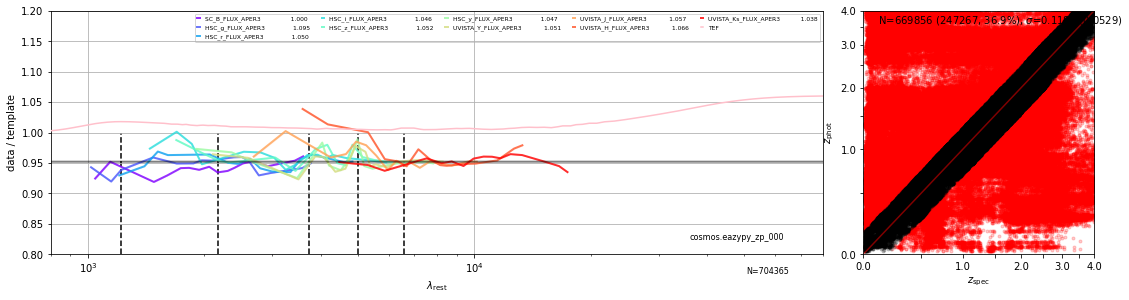

In [9]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)
print('NBIN: ', NBIN)
print('NOBJ: ', self.NOBJ)
print(self.NOBJ//100)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    
    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=6, 
                              save_templates=False, error_residuals=False, 
                              NBIN=NBIN, get_spatial_offset=False)

In [ ]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=6)

In [ ]:
# Show zspec-zphot comparison
fig = self.zphot_zspec()

In [ ]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[])

# 'zout' also saved to [MAIN_OUTPUT_FILE].zout.fits

In [ ]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel], 
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$') 

In [ ]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = 25 - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])

In [ ]:
zout.info()

In [ ]:
print(zout['z_spec'])
print(zout['z_phot'])

In [ ]:
print(hdu.info())

In [ ]:
hdu[4].data